In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Reading the dataset using pandas
data=pd.read_csv(r'C:\Users\Priyanka\Downloads\Fake-news-project\Fake news project\train_news.csv')

In [3]:
#Displaying the first 10 observations
data.head(10)

Unnamed: 0     id                                           headline  \
0           0   9653  Ethics Questions Dogged Agriculture Nominee as...   
1           1  10041  U.S. Must Dig Deep to Stop Argentina’s Lionel ...   
2           2  19113  Cotton to House: ’Do Not Walk the Plank and Vo...   
3           3   6868  Paul LePage, Besieged Maine Governor, Sends Co...   
4           4   7596                       A Digital 9/11 If Trump Wins   
5           5   3196  Whatever the Outcome on November 8th the US Wi...   
6           6   5134  Rapid Evolution Saved This Fish From Pollution...   
7           7   1504  Alabama Prison Officials Retaliate Against Pri...   
8           8  13559                                                NaN   
9           9   4203           Can We Live in a Constant State of Love?   

                   written_by  \
0  Eric Lipton and Steve Eder   
1             David Waldstein   
2                     Pam Key   
3                Jess Bidgood   
4           Finian Cunningham   
5                         NaN   
6                JoAnna Klein   
7            Brian Sonenstein   
8                 steventexas   
9                     Gillian   

                                                news  label  
0  WASHINGTON  —   In Sonny Perdue’s telling, Geo...      0  
1  HOUSTON  —   Venezuela had a plan. It was a ta...      0  
2  Sunday on ABC’s “This Week,” while discussing ...      0  
3  AUGUSTA, Me.  —   The beleaguered Republican g...      0  
4    Finian Cunningham has written extensively on...      1  
5  Taming the corporate media beast Whatever the ...      1  
6  The State of New Jersey says you can’t eat the...      0  
7  Advocates say prison officials at the Kilby Co...      1  
8  People have made up their minds on president.\...      1  
9  Leave a reply \nToni Emerson – When we fall in...      1

In [4]:
#checking the shape of the data
data.shape

(20800, 6)

In [5]:
#observing the first three observations of the feature 'headline'
data['headline'][0]

'Ethics Questions Dogged Agriculture Nominee as Georgia Governor - The New York Times'

In [6]:
data['headline'][1]

'U.S. Must Dig Deep to Stop Argentina’s Lionel Messi - The New York Times'

In [7]:
data['headline'][2]

'Cotton to House: ’Do Not Walk the Plank and Vote for a Bill that Cannot Pass the Senate’ - Breitbart'

Observation:

  >The text is not clean as it has punctuations, upper case letter, numbers, special characters which are not going to contribute in identyfying the fake news. We would clean the data ahead using NLP.

In [8]:
#Basic information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  20800 non-null  int64 
 1   id          20800 non-null  int64 
 2   headline    20242 non-null  object
 3   written_by  18843 non-null  object
 4   news        20761 non-null  object
 5   label       20800 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 975.1+ KB


OBSERVATION:

    > The dataset has null values in the features- headline, written_by, news.
    
    > The dataset comprises of int and object datatypes.

Null Value Count
Unnamed: 0                 0
id                         0
headline                 558
written_by              1957
news                      39
label                      0

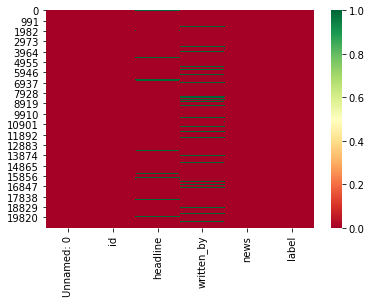

In [9]:
#Using heatmap to observe the missing values
sns.heatmap(data.isnull(),cmap='RdYlGn')
data.isnull().sum().to_frame().rename(columns={0:'Null Value Count'})

In [10]:
#checking the datatypes in the dataset
data.dtypes

Unnamed: 0     int64
id             int64
headline      object
written_by    object
news          object
label          int64
dtype: object

Observation:
    
    > We have 558 missing values in feature headline, 1957 missing values in feature written_by and 39 missing values in feature news.

In [11]:
#We will drop the missing values from our dataset.
#As we have text data in the dataset any other feature engineering would not work on handling missing values, dropping works fine when we have text data.
#resetting the index as to not have any problem in text preprocessing using NLP as we can put a for loop to the text data. 
df=data.dropna()
df.reset_index(inplace=True)

In [12]:
print('Total {} observations were in the dataset before dropping missing values.'.format(data.shape[0]))
print('{} observations were left after dropping missing values'.format(df.shape[0]))
print('We only lost {} observations in dropping missing values.'.format(data.shape[0]-df.shape[0]))

Total 20800 observations were in the dataset before dropping missing values.
18285 observations were left after dropping missing values
We only lost 2515 observations in dropping missing values.


In [13]:
#observing the index of the dataset.
df.head(10)

index  Unnamed: 0     id  \
0      0           0   9653   
1      1           1  10041   
2      2           2  19113   
3      3           3   6868   
4      4           4   7596   
5      6           6   5134   
6      7           7   1504   
7      9           9   4203   
8     10          10  11136   
9     11          11   2150   

                                            headline  \
0  Ethics Questions Dogged Agriculture Nominee as...   
1  U.S. Must Dig Deep to Stop Argentina’s Lionel ...   
2  Cotton to House: ’Do Not Walk the Plank and Vo...   
3  Paul LePage, Besieged Maine Governor, Sends Co...   
4                       A Digital 9/11 If Trump Wins   
5  Rapid Evolution Saved This Fish From Pollution...   
6  Alabama Prison Officials Retaliate Against Pri...   
7           Can We Live in a Constant State of Love?   
8  Is Hillary a Closet Drunk… New WikiLeak Email ...   
9  BLOOMBERG-BACKED PENNSYLVANIA ATTORNEY GENERAL...   

                   written_by  \
0  Eric Lipton and Steve Eder   
1             David Waldstein   
2                     Pam Key   
3                Jess Bidgood   
4           Finian Cunningham   
5                JoAnna Klein   
6            Brian Sonenstein   
7                     Gillian   
8                    V Saxena   
9                  Iron Sheik   

                                                news  label  
0  WASHINGTON  —   In Sonny Perdue’s telling, Geo...      0  
1  HOUSTON  —   Venezuela had a plan. It was a ta...      0  
2  Sunday on ABC’s “This Week,” while discussing ...      0  
3  AUGUSTA, Me.  —   The beleaguered Republican g...      0  
4    Finian Cunningham has written extensively on...      1  
5  The State of New Jersey says you can’t eat the...      0  
6  Advocates say prison officials at the Kilby Co...      1  
7  Leave a reply \nToni Emerson – When we fall in...      1  
8  BREAKING: Clinton Fixer Reveals Sick Smear Hil...      1  
9  Home › POLITICS | US NEWS › BLOOMBERG-BACKED P...      1

In [14]:
#cat_col is the list of categorical columns
#num_col is the list of numerical columns
cat_col=[i for i in df.columns if df[i].dtypes=='O']
num_col=[i for i in df.columns if i not in cat_col]
print(cat_col,'\t',num_col)

['headline', 'written_by', 'news'] 	 ['index', 'Unnamed: 0', 'id', 'label']


In [15]:
#statistical information about the categorical columns of the dataset.
df[cat_col].describe()

headline written_by   news
count                                               18285      18285  18285
unique                                              17931       3838  18017
top     Get Ready For Civil Unrest: Survey Finds That ...    Pam Key       
freq                                                    5        243     72

Observation:

    > Count for each feature is 18285 after removing the missing values.
    
    > We can see the number of unique observation in each of the feature, also the top appering observation with the frequency of the top observation casn be studied with the help of describe function.

In [16]:
#statistical inferences about the numerical columns
df[num_col].describe()

index    Unnamed: 0            id         label
count  18285.000000  18285.000000  18285.000000  18285.000000
mean   10402.462401  10402.462401  10409.807383      0.433361
std     6007.395334   6007.395334   5998.216236      0.495553
min        0.000000      0.000000      0.000000      0.000000
25%     5206.000000   5206.000000   5217.000000      0.000000
50%    10413.000000  10413.000000  10422.000000      0.000000
75%    15596.000000  15596.000000  15603.000000      1.000000
max    20799.000000  20799.000000  20799.000000      1.000000

Observation:

    > Features 'Unnamed: 0' ane 'id' are unique to each observation.
    
    > Feature label is imbalanced as 75% of the observations are labelled as 0.

# DATA PRE-PROCESSING

In data-preprocessing we will clean the text in following manner:

    1. Removing everything from the text except words, as number, punctuations, special characters cannot be used to identify a fake news.
    2. Converting all the words to lowercase so their is no difference between 'New' and 'new'.
    3. Splitting the text into single words.
    4. Removing Stop words- stopwords are the words which doesnot hold much importance and additionally add no meaning to the text.
    5. Applying porter stemmer to convert the inflected words to a base word.

In [17]:
from nltk.corpus import stopwords   #importing stopwords
from nltk.stem.porter import PorterStemmer  #importing porter stemmer
import re  #importing regular expression

In [19]:
def processed(text):
    clean=re.sub('[^a-zA-Z]',' ',text)  #replace everything except words with a blank space
    clean=clean.lower()                 #lower case the words
    clean=clean.split()                 #splitting the sentence into single words
    
    clean=[ps.stem(i) for i in clean if i not in stopwords.words('english')]  #removing stopwords and converting inflected words to base word
    clean=' '.join(clean)   #joining the split words again into sentence
    return clean    #returning clean text

In [20]:
#applying the above defined function to pre-process the text
df['news']=df['news'].apply(processed)

In [21]:
df

index  Unnamed: 0     id  \
0          0           0   9653   
1          1           1  10041   
2          2           2  19113   
3          3           3   6868   
4          4           4   7596   
...      ...         ...    ...   
18280  20794       20794    366   
18281  20796       20796  14831   
18282  20797       20797  18142   
18283  20798       20798  12139   
18284  20799       20799  15660   

                                                headline  \
0      Ethics Questions Dogged Agriculture Nominee as...   
1      U.S. Must Dig Deep to Stop Argentina’s Lionel ...   
2      Cotton to House: ’Do Not Walk the Plank and Vo...   
3      Paul LePage, Besieged Maine Governor, Sends Co...   
4                           A Digital 9/11 If Trump Wins   
...                                                  ...   
18280  One Police Shift: Patrolling an Anxious Americ...   
18281        Albert Pike and the European Migrant Crisis   
18282  Dakota Access Caught Infiltrating Protests to ...   
18283  How to Stretch the Summer Solstice - The New Y...   
18284  Emory University to Pay for ’100 Percent’ of U...   

                       written_by  \
0      Eric Lipton and Steve Eder   
1                 David Waldstein   
2                         Pam Key   
3                    Jess Bidgood   
4               Finian Cunningham   
...                           ...   
18280          The New York Times   
18281               Rixon Stewart   
18282                 Eddy Lavine   
18283              Alison S. Cohn   
18284                Tom Ciccotta   

                                                    news  label  
0      washington sonni perdu tell georgian grow wear...      0  
1      houston venezuela plan tactic approach design ...      0  
2      sunday abc week discuss republican plan repeal...      0  
3      augusta beleagu republican governor main seem ...      0  
4      finian cunningham written extens intern affair...      1  
...                                                  ...    ...  
18280  polic america today rib dinner paid stranger p...      0  
18281  rixon stewart novemb rixon stewart nov migrant...      1  
18282  post eddi know dakota access pipelin protest w...      1  
18283  offici summer societi boutiqu societi memori s...      0  
18284  emori univers atlanta georgia announc fund per...      0  

[18285 rows x 7 columns]

In [25]:
#keeping just news and label in a dataframe
clean_data=df[['news','label']].copy()
clean_data

news  label
0      washington sonni perdu tell georgian grow wear...      0
1      houston venezuela plan tactic approach design ...      0
2      sunday abc week discuss republican plan repeal...      0
3      augusta beleagu republican governor main seem ...      0
4      finian cunningham written extens intern affair...      1
...                                                  ...    ...
18280  polic america today rib dinner paid stranger p...      0
18281  rixon stewart novemb rixon stewart nov migrant...      1
18282  post eddi know dakota access pipelin protest w...      1
18283  offici summer societi boutiqu societi memori s...      0
18284  emori univers atlanta georgia announc fund per...      0

[18285 rows x 2 columns]

The text data now is clean to be visualized and modelled.

# VISUALIZATION

0    10361
1     7924
Name: label, dtype: int64

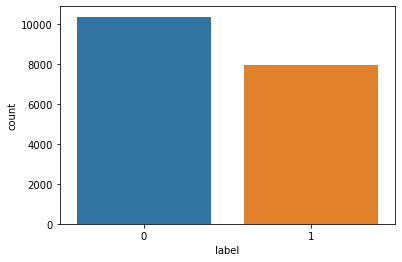

In [27]:
#checking the frequency of the labels using countplot
sns.countplot(clean_data['label'])
clean_data['label'].value_counts()

Observation:
    
    > There are 7924 news classified as fake in the dataset and 10361 genuine news.
    
    > Label is not highly imbalanced. 

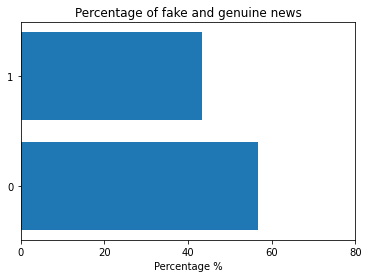

56.66393218485097 	 43.33606781514903


In [39]:
#Checking the percentage of fake news.
fake=clean_data['label'].sum()/len(clean_data)*100
genuine=100-fake
ax=np.arange(2)

plt.barh(ax,[genuine,fake])
plt.xlabel('Percentage %')
plt.xticks(np.arange(0,100,20))
plt.title('Percentage of fake and genuine news')
plt.yticks(ax)
plt.show()
print(genuine,'\t',fake)

Observation:
    
    >The fake news are 43.33 percent of the total observations and genuine news are 56.66 percent. 

In [26]:
#checking the length of the news
clean_data['len']=clean_data['news'].str.len()
clean_data

news  label    len
0      washington sonni perdu tell georgian grow wear...      0   4547
1      houston venezuela plan tactic approach design ...      0   3622
2      sunday abc week discuss republican plan repeal...      0    245
3      augusta beleagu republican governor main seem ...      0   3793
4      finian cunningham written extens intern affair...      1   5733
...                                                  ...    ...    ...
18280  polic america today rib dinner paid stranger p...      0  10847
18281  rixon stewart novemb rixon stewart nov migrant...      1   3867
18282  post eddi know dakota access pipelin protest w...      1   2182
18283  offici summer societi boutiqu societi memori s...      0   1469
18284  emori univers atlanta georgia announc fund per...      0   1211

[18285 rows x 3 columns]

In [38]:
#storing the clean data to not lose the progress of the project
clean_data.to_csv('fake_new.csv')

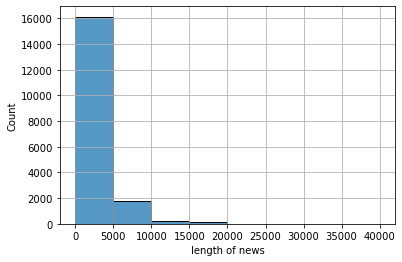

The shortest news is of length: 0
The longest news is of length: 72006


In [42]:
#Checking the length of news through histogram
bins=[0,5000,10000,15000,20000,25000,30000,35000,40000]
sns.histplot(clean_data['len'],bins=bins)
plt.grid(True)
plt.xlabel('length of news')
plt.show()
print('The shortest news is of length:',clean_data['len'].min())
print('The longest news is of length:',clean_data['len'].max())

Observation:
    
    > Around 16000 of the news are of length 0-5000.
    
    > Less than 2500 news have length more than 5000.

In [47]:
print('{} news have more than 5000 words'.format(len(clean_data[clean_data['len']>5000]['len'])))

2149 news have more than 5000 words


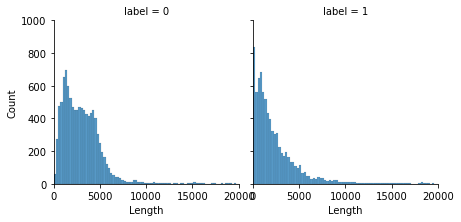

In [52]:
#checking the length of news for labels separately using FacetGrid
g=sns.FacetGrid(clean_data,col='label')
g.map_dataframe(sns.histplot,x='len')
plt.axis([0,20000,0,1000])
g.set_axis_labels('Length','Count')
plt.show()

Observation:
    
    > For label 0 and 1 text data in news have upto 5000 words.
    
    > For fake news we can observe the highest frequency at around 1000.

# WORD CLOUD 

Wordcloud is useful in displaying frequntly occuring words.

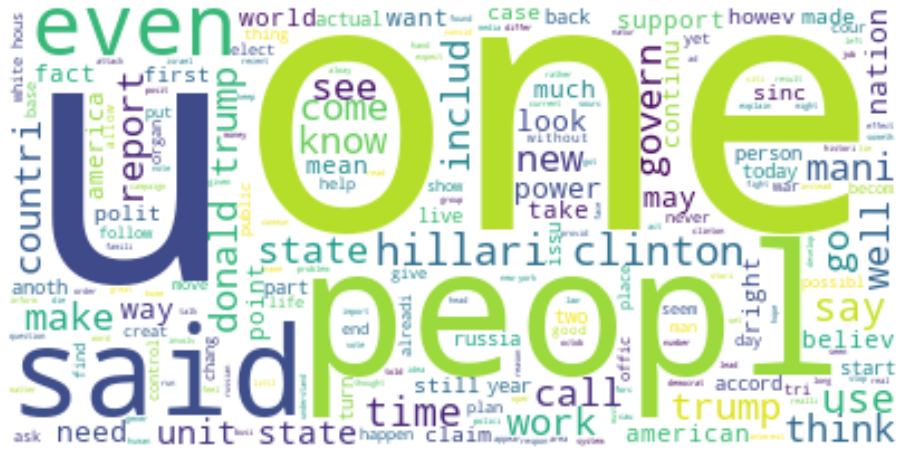

In [56]:
#wordcloud for fake news
import wordcloud
from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator
fake=clean_data[clean_data['label']==1]
text=fake.news.values
wc=WordCloud(background_color='white',max_font_size=160).generate(" ".join(text))
plt.figure(figsize=(16,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off') # turn off axis
plt.show()

Observation:

     > The frequently occuring words in fake news are : one, said, includ, peopl, said, even. The size of the word indicates the frequecy of the word in the text.
            

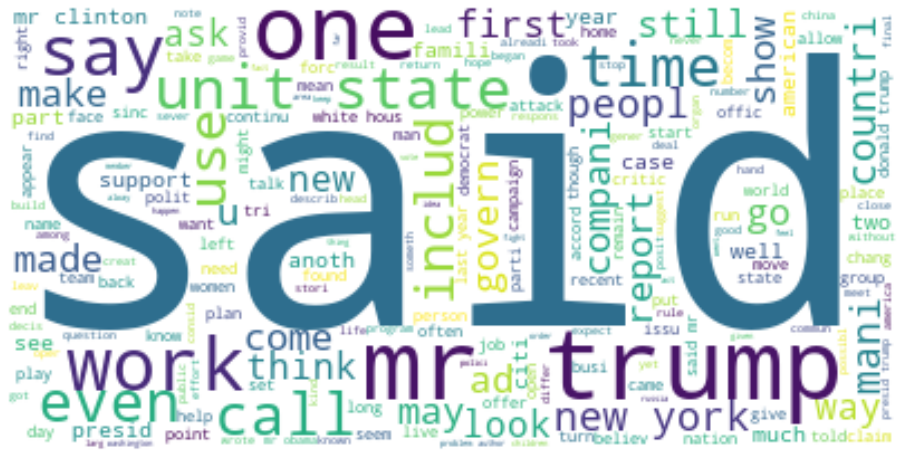

In [57]:
#wordcloud for non fake news
import wordcloud
from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator
genuine=clean_data[clean_data['label']==0]
text=genuine.news.values
wc=WordCloud(background_color='white',max_font_size=160).generate(" ".join(text))
plt.figure(figsize=(16,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off') # turn off axis
plt.show()

Observation:
    
    > The frequently occuring words in non-fake news are : work, said, unit, state, say, call etc. 

In [58]:
#converting words in th text data to vectors using CountVectorizer 
#With max_features we decide the maximum columns we wish to keep. max_features would take frequent 15000 words from the text.
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=15000,ngram_range=(1,3))
x=cv.fit_transform(clean_data['news']).toarray()

In [64]:
#Separating the target variable
y=clean_data['label']

In [65]:
#importing train_test_split
from sklearn.model_selection import train_test_split

In [66]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
print('x_train\tx_test\ty_train\ty_test')
print(x_train.shape,'\t',x_test.shape,'\t',y_train.shape,'\t',y_test.shape)

x_train	x_test	y_train	y_test
(12799, 15000) 	 (5486, 15000) 	 (12799,) 	 (5486,)


In [77]:
#importing Machine learning algorithms
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import GridSearchCV

#importing evaluation metrics
from sklearn.metrics import plot_confusion_matrix, confusion_matrix, accuracy_score, classification_report, log_loss
from sklearn.metrics import roc_auc_score, roc_curve, auc, f1_score

In [82]:
#Grid search cv to find optimal paramters for MultinomialNB
mn=MultinomialNB()
params={'alpha':np.arange(0,1,0.1)}
cv=GridSearchCV(mn,params,n_jobs=-1,scoring='accuracy')
cv.fit(x_train,y_train)
print(cv.best_params_)

{'alpha': 0.0}


In [86]:
#GridSearchCv to find optimal parameters for logistic regression
lg=LogisticRegression()
param={'penalty':['l1','l2']}
cv=GridSearchCV(lg,param,n_jobs=-1,scoring='accuracy')
cv.fit(x_train,y_train)
print(cv.best_params_)

{'penalty': 'l2'}


In [87]:
#Using GridSearchCV to optimize hyper parametres for DecisionTreeClassifier
parameters={'criterion':['entropy','gini']}
dtc=DecisionTreeClassifier()
cv=GridSearchCV(dtc,parameters,n_jobs=-1,scoring='accuracy')
cv.fit(x_train,y_train)
print(cv.best_params_)

{'criterion': 'gini'}


In [90]:
#Using GridSearchCv to find out best parameters for RandomForestClassifier
parameters={'criterion':['gini','entropy']}
rfc=RandomForestClassifier()
cv=GridSearchCV(rfc,parameters,n_jobs=-1,scoring='accuracy')
cv.fit(x_train,y_train)
print(cv.best_params_)

{'criterion': 'entropy'}


In [91]:
#Now we have the optimal parameters we will make class of every algorithms.
lg=LogisticRegression(penalty='l2')
rf=RandomForestClassifier(criterion='entropy')
mn=MultinomialNB(alpha=0.0)
dt=DecisionTreeClassifier(criterion='gini')

In [92]:
#Making a list of all the algorithms.
Model=[]
Model.append(('RandomForestClassifier',rf))
Model.append(('LogisticRegression',lg))
Model.append(('MultinomialNB',mn))
Model.append(('DecisionTreeClassifier',dt))

Model: RandomForestClassifier

RandomForestClassifier(criterion='entropy')


Accuracy Score:  0.940940576011666
F1 Score:  0.9304422498926578
Log loss: 2.039871138644963
AUC_ROC_Score 0.942375121994135


[[2995  112]
 [ 212 2167]]


Classification Report: 
               precision    recall  f1-score   support

           0       0.93      0.96      0.95      3107
           1       0.95      0.91      0.93      2379

    accuracy                           0.94      5486
   macro avg       0.94      0.94      0.94      5486
weighted avg       0.94      0.94      0.94      5486





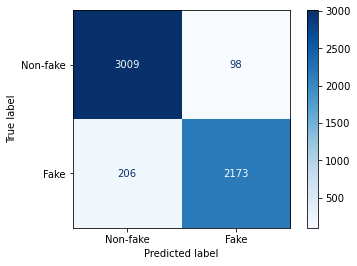

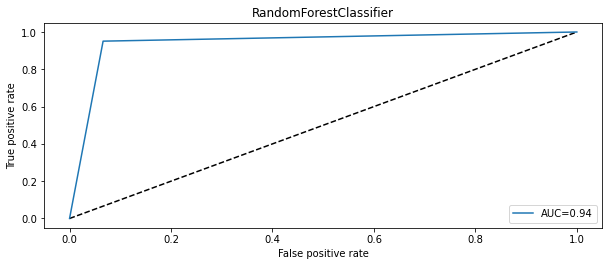



Model: LogisticRegression

LogisticRegression()


Accuracy Score:  0.95625227852716
F1 Score:  0.9496855345911949
Log loss: 1.5110093855059443
AUC_ROC_Score 0.9552343906774801


[[2981  126]
 [ 114 2265]]


Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.96      0.96      3107
           1       0.95      0.95      0.95      2379

    accuracy                           0.96      5486
   macro avg       0.96      0.96      0.96      5486
weighted avg       0.96      0.96      0.96      5486





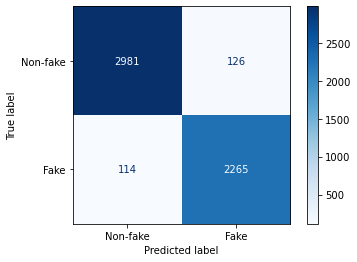

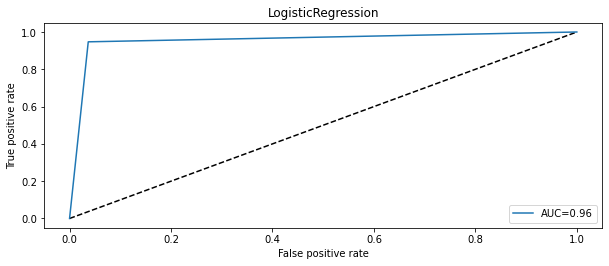



Model: MultinomialNB

MultinomialNB(alpha=0.0)


Accuracy Score:  0.9325555960627051
F1 Score:  0.9206349206349207
Log loss: 2.329481146977432
AUC_ROC_Score 0.9336234686901748


[[2970  137]
 [ 233 2146]]


Classification Report: 
               precision    recall  f1-score   support

           0       0.93      0.96      0.94      3107
           1       0.94      0.90      0.92      2379

    accuracy                           0.93      5486
   macro avg       0.93      0.93      0.93      5486
weighted avg       0.93      0.93      0.93      5486





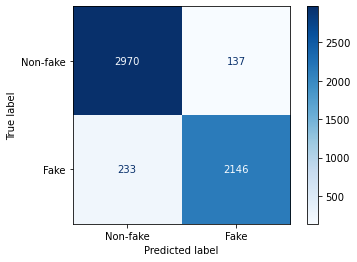

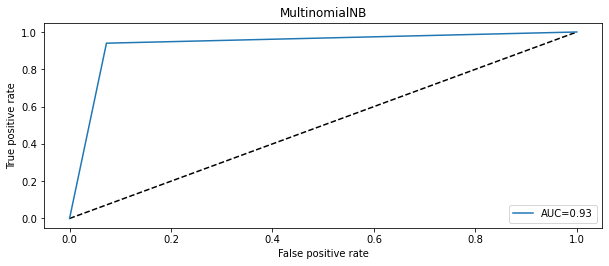



Model: DecisionTreeClassifier

DecisionTreeClassifier()


Accuracy Score:  0.8866204885162231
F1 Score:  0.8687209793161671
Log loss: 3.916036381408957
AUC_ROC_Score 0.8848746297918294


[[2806  301]
 [ 321 2058]]


Classification Report: 
               precision    recall  f1-score   support

           0       0.90      0.90      0.90      3107
           1       0.87      0.87      0.87      2379

    accuracy                           0.89      5486
   macro avg       0.88      0.88      0.88      5486
weighted avg       0.89      0.89      0.89      5486





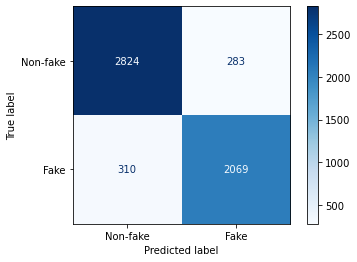

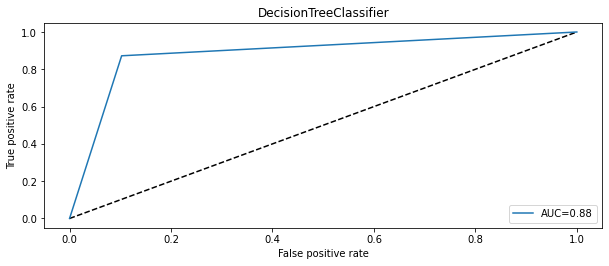

In [93]:
Models=[]
Accuracy=[]
Auc=[]
F1=[]
Log_loss=[]

for i,j in Model:
    print('Model: {}\n'.format(i))
    Models.append(i)
    
    j.fit(x_train,y_train)
    print(j)
    pred=j.predict(x_test)
    print('\n')
    
    acc=accuracy_score(pred,y_test)
    print('Accuracy Score: ',acc)
    Accuracy.append(acc*100)
    
    f1=f1_score(pred,y_test)
    print('F1 Score: ',f1)
    F1.append(f1*100)
    
    log=log_loss(pred,y_test)
    print('Log loss:',log)
    Log_loss.append(log)
    
    false_positive_rate,true_positive_rate,threshold=roc_curve(pred,y_test)
    roc_auc=auc(false_positive_rate,true_positive_rate)
    print("AUC_ROC_Score",roc_auc)
    Auc.append(roc_auc*100)
    print("\n")
    
    #Confusion Matrix
    cm=confusion_matrix(y_test,pred)
    print(cm)
    print('\n')
    
    #Classification Report
    print("Classification Report: \n",classification_report(y_test,pred))
    print('\n')
    
    #Confusion Matrix using Heatmap
    plot_confusion_matrix(j.fit(x_train,y_train),x_test,y_test,display_labels=['Non-fake','Fake'],cmap=plt.cm.Blues)
    plt.show()
    print("\n")
    
    #Auc_Roc_curve
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(i)
    plt.plot([0,1],[0,1],'k--')
    plt.plot(false_positive_rate,true_positive_rate,label='AUC=%.2f'%roc_auc)
    plt.legend(loc='lower right')
    plt.ylabel('True positive rate')
    plt.xlabel('False positive rate')
    plt.show()
    print('\n')

In [94]:
#Dataframe to display all the results from different models.
pd.DataFrame({"Model":Models,"Accuracy Score":Accuracy,"F1 Score":F1,'ROC_AUC_Score':Auc,'Log loss':Log_loss})

Model  Accuracy Score   F1 Score  ROC_AUC_Score  Log loss
0  RandomForestClassifier       94.094058  93.044225      94.237512  2.039871
1      LogisticRegression       95.625228  94.968553      95.523439  1.511009
2           MultinomialNB       93.255560  92.063492      93.362347  2.329481
3  DecisionTreeClassifier       88.662049  86.872098      88.487463  3.916036

Observation:
    
    Random  forest classifier has an accuracy score of 94, f1 score of 93 and a lower loss. Also, Random forest being a bagging classifier avoids overfitting. We will save Random forest.

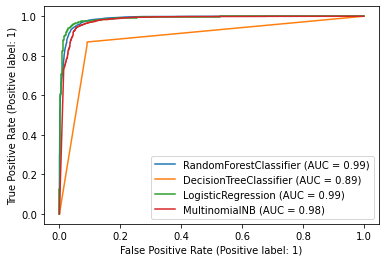

In [99]:
#Plotting roc curve of the models
from sklearn.metrics import plot_roc_curve

classifiers = [rf, dt, lg, mn]
ax = plt.gca()
for i in classifiers:
    plot_roc_curve(i, x_test, y_test, ax=ax)

In [100]:
#Saving the best model
import joblib
joblib.dump(rf,'fakenews.pkl')

['fakenews.pkl']